In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import re
import warnings
from collections import Counter

from scipy.fftpack import fft
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA

/home/fehiepsi/miniconda3/envs/pydata/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
train = pd.read_csv('../data/wttsf/train_1.csv', index_col='Page').fillna(0)
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [28]:
train["aa"] = train.index.str.rsplit('_').str.get(-1)

In [29]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,aa
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,spider
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,spider
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,spider
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,spider
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,spider


In [19]:
pd.get_dummies(train[["agent", "access", "project"]], columns=["agent", "access", "project"])

,agent_all-agents,agent_spider,access_all-access,access_desktop,access_mobile-web,project_commons.wikimedia.org,project_de.wikipedia.org,project_en.wikipedia.org,project_es.wikipedia.org,project_fr.wikipedia.org,project_ja.wikipedia.org,project_ru.wikipedia.org,project_www.mediawiki.org,project_zh.wikipedia.org
0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,0,0,0,0,0,0,0,0,0,1
5,0,1,1,0,0,0,0,0,0,0,0,0,0,1
6,0,1,1,0,0,0,0,0,0,0,0,0,0,1
7,0,1,1,0,0,0,0,0,0,0,0,0,0,1
8,0,1,1,0,0,0,0,0,0,0,0,0,0,1
9,0,1,1,0,0,0,0,0,0,0,0,0,0,1


In [16]:
train["agent"] = train.Page.str.rsplit('_').str.get(-1)
train["access"] = train.Page.str.rsplit('_').str.get(-2)
train["project"] = train.Page.str.rsplit('_').str.get(-3)
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,agent,access,project
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,26.0,14.0,20.0,22.0,19.0,18.0,20.0,spider,all-access,zh.wikipedia.org
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,15.0,9.0,30.0,52.0,45.0,26.0,20.0,spider,all-access,zh.wikipedia.org
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,7.0,4.0,4.0,6.0,3.0,4.0,17.0,spider,all-access,zh.wikipedia.org
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,27.0,16.0,11.0,17.0,19.0,10.0,11.0,spider,all-access,zh.wikipedia.org
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,3.0,11.0,27.0,13.0,36.0,10.0,spider,all-access,zh.wikipedia.org


In [17]:
train.Page.str.rsplit('_').str.get(-3).unique()

array(['zh.wikipedia.org', 'fr.wikipedia.org', 'en.wikipedia.org',
       'commons.wikimedia.org', 'ru.wikipedia.org', 'www.mediawiki.org',
       'de.wikipedia.org', 'ja.wikipedia.org', 'es.wikipedia.org'], dtype=object)

In [13]:
train.Page.str.rsplit('_').str.get(-1).unique()

array(['spider', 'all-agents'], dtype=object)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
for col in train.columns[1:]:
    train[col] = pd.to_numeric(train[col], downcast='integer')
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,2PM_zh.wikipedia.org_all-access_spider,11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,3C_zh.wikipedia.org_all-access_spider,1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,4minute_zh.wikipedia.org_all-access_spider,35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0,0,0,0,0,0,0,0,0,...,48,9,25,13,3,11,27,13,36,10


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: int32(550), object(1)
memory usage: 305.5+ MB


In [18]:
def get_language(page):
    res = re.search('(?<=_)[a-z]+(?=.wikipedia.org_)', page)
    if res:
        return res.group(0)
    return 'na'

train['lang'] = train.Page.map(get_language)
print(Counter(train.lang))

Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'na': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [19]:
lang_sets = {}
lang_sets['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train[train.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train[train.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train[train.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train[train.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train[train.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train[train.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train[train.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

In [24]:
days = list(range(sums['en'].shape[0]))

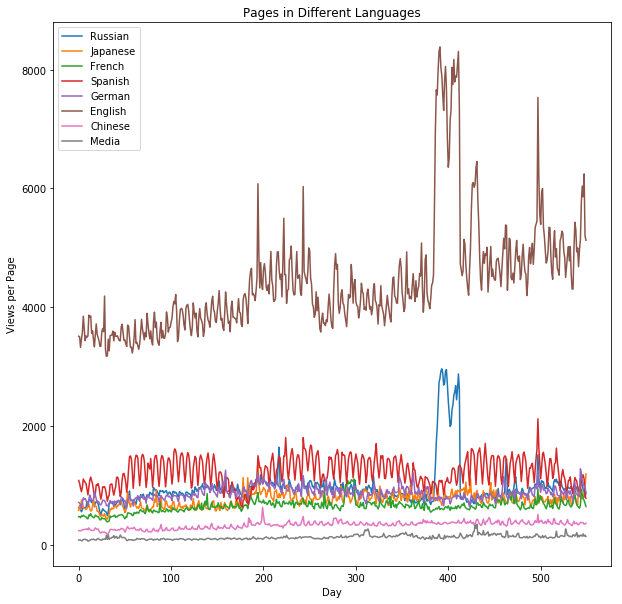

In [27]:
plt.figure(figsize=[10, 10])
plt.xlabel('Day')
plt.ylabel('Views per Page')
plt.title('Pages in Different Languages')
labels = {'en': 'English', 'ja': 'Japanese', 'de': 'German',
          'na': 'Media', 'fr': 'French', 'zh': 'Chinese',
          'ru': 'Russian', 'es': 'Spanish'}

for key in sums:
    plt.plot(days, sums[key], label=labels[key])

plt.legend()
plt.show()

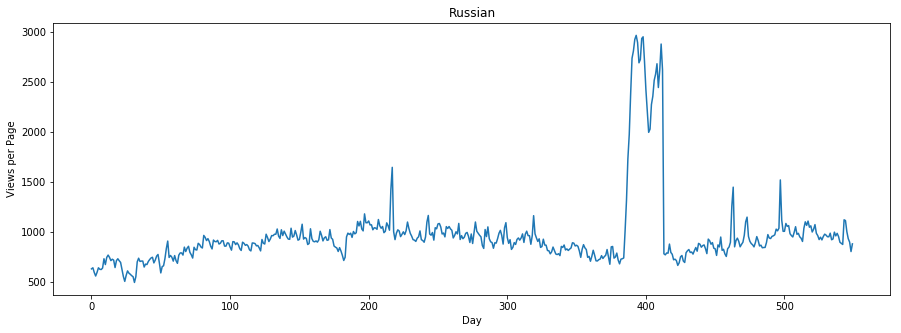

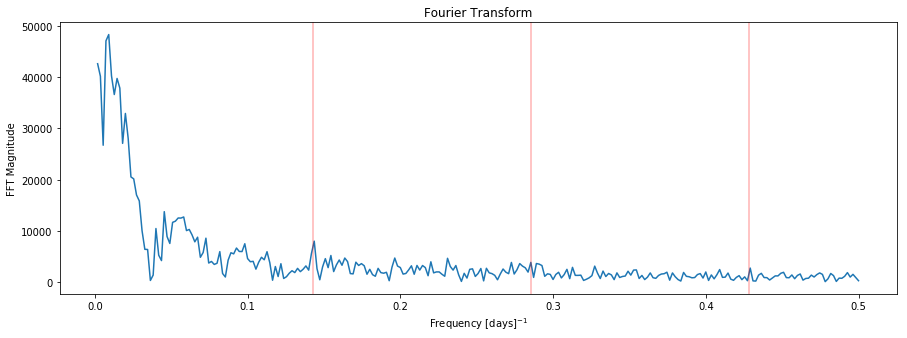

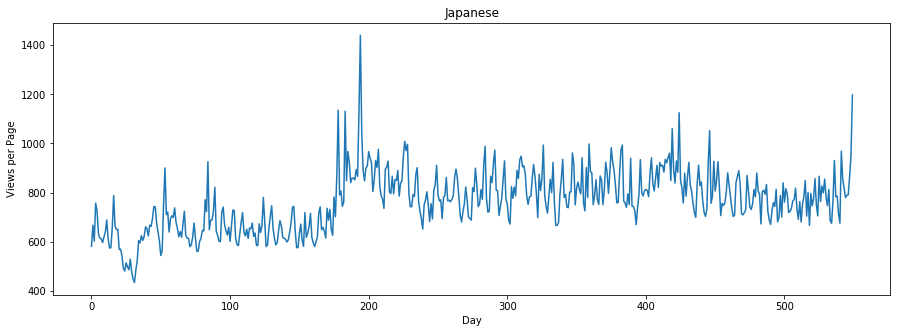

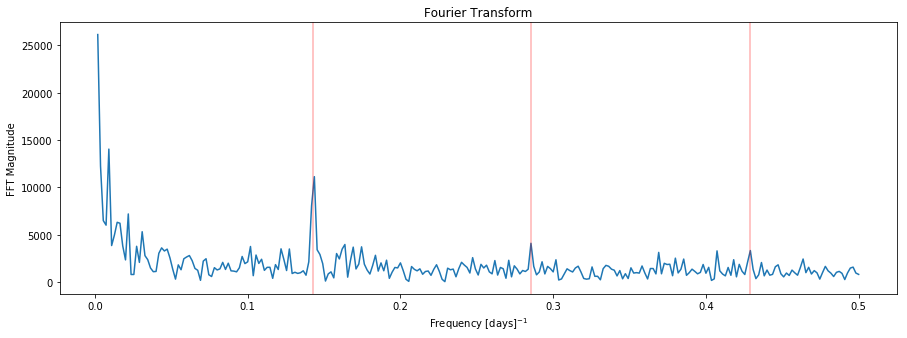

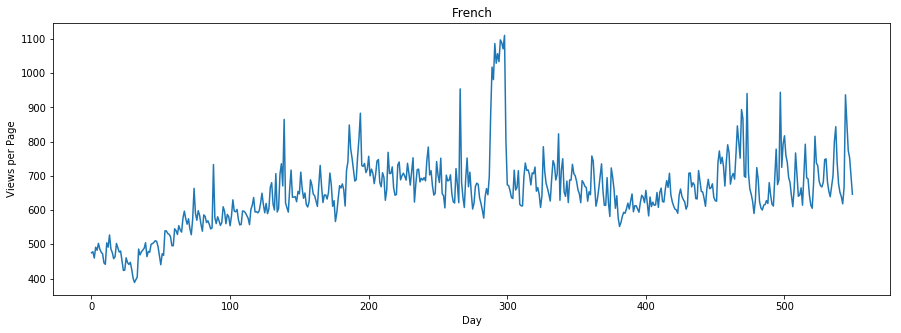

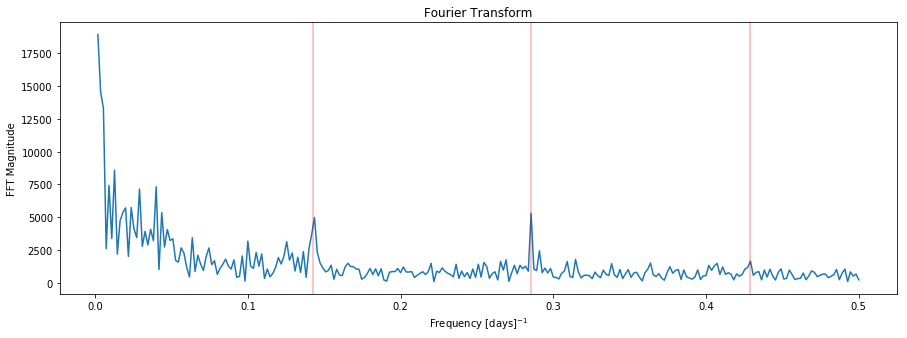

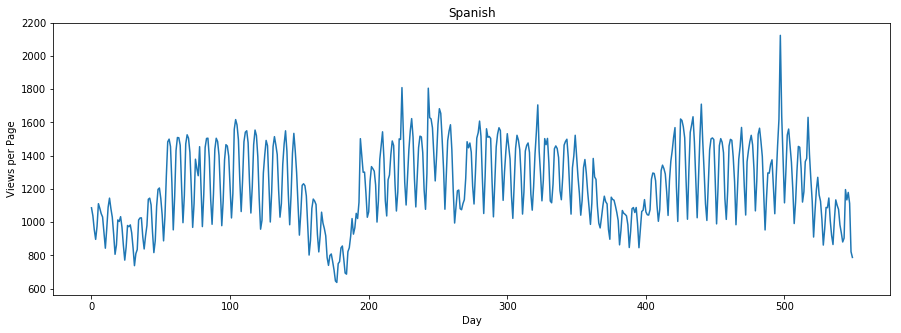

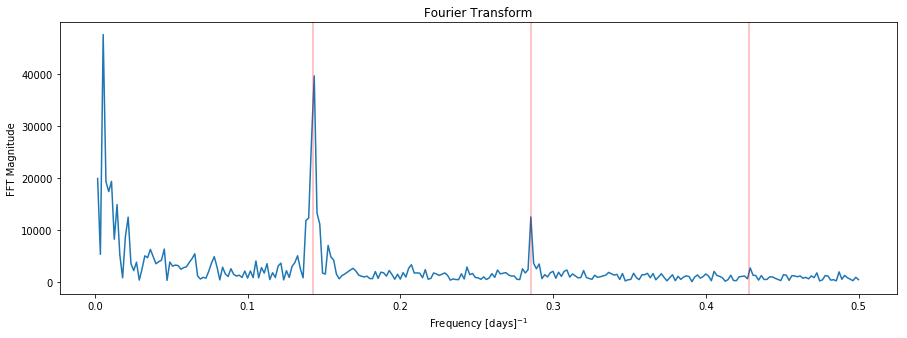

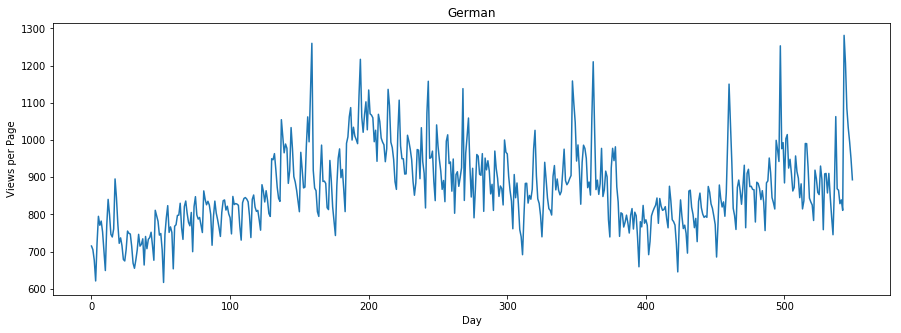

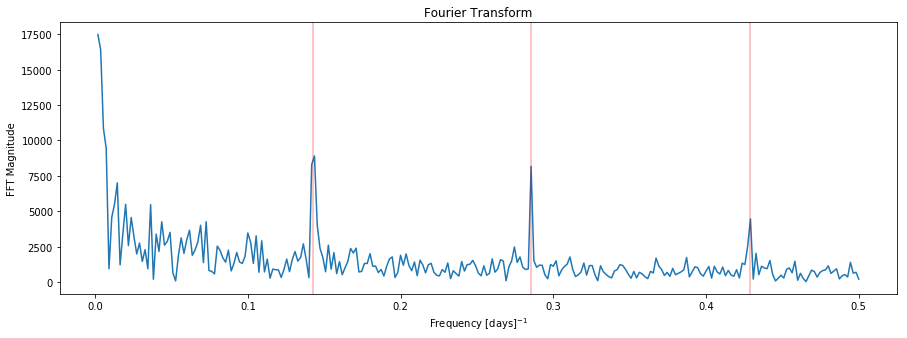

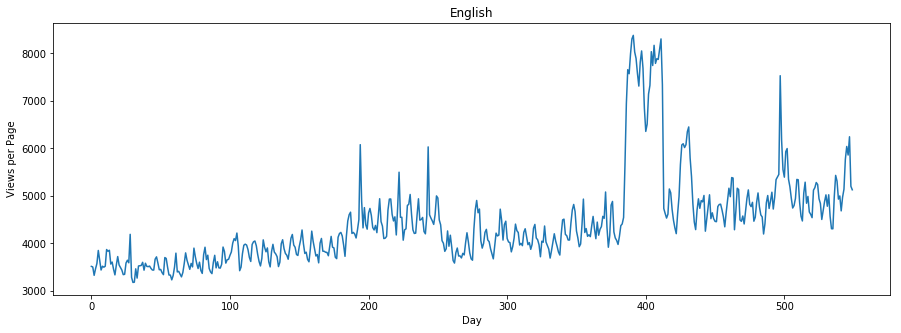

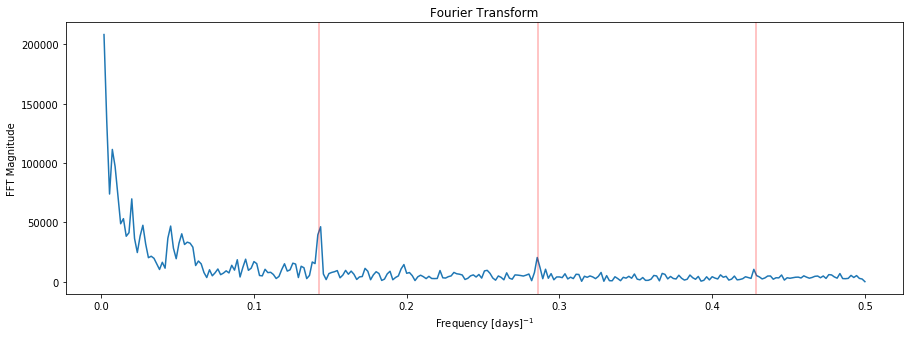

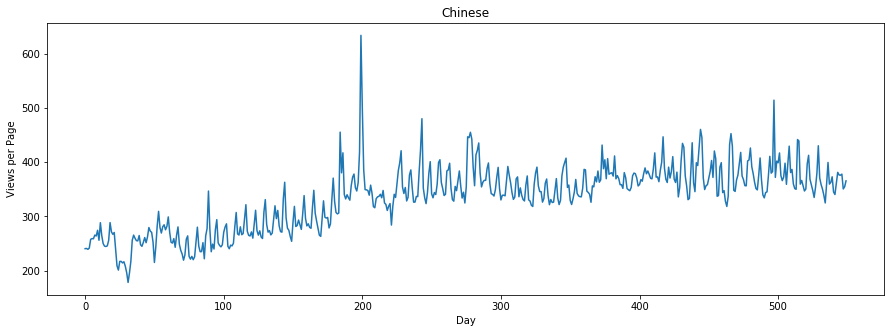

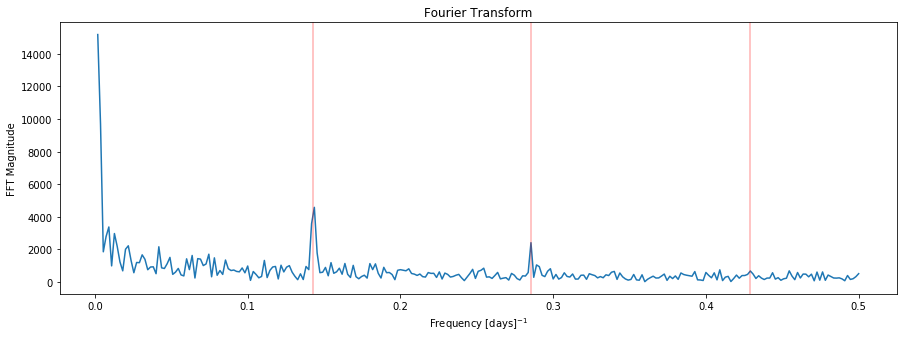

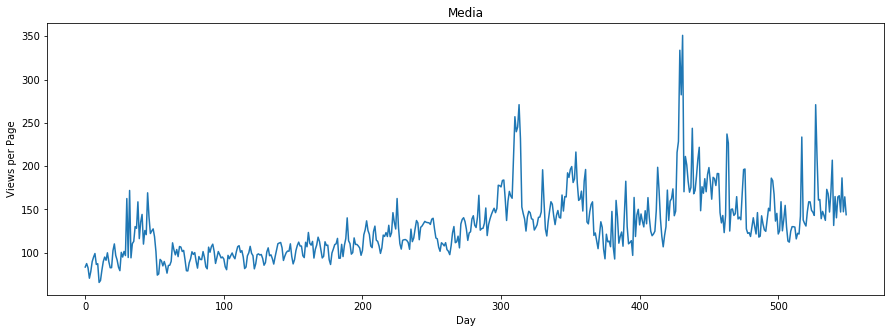

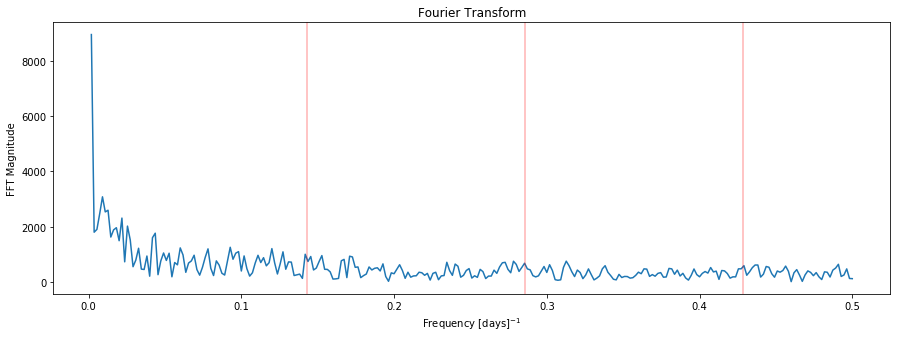

In [30]:
def plot_with_fft(key):
    plt.figure(figsize=[15, 5])
    plt.xlabel('Day')
    plt.ylabel('Views per Page')
    plt.title(labels[key])
    plt.plot(days, sums[key], label=labels[key])
    
    fft_complex = fft(sums[key])
    fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_complex]
    fft_xvals = [day / len(days) for day in days]
    npts = len(fft_xvals) // 2 + 1
    fft_mag = fft_mag[:npts]
    fft_xvals = fft_xvals[:npts]
    
    plt.figure(figsize=[15, 5])
    plt.xlabel(r"Frequency [days]$^{-1}$")
    plt.ylabel('FFT Magnitude')
    plt.title('Fourier Transform')
    plt.plot(fft_xvals[1:], fft_mag[1:], label=labels[key])
    
    # Draw lines at 1, 1/2, and 1/3 week periods
    plt.axvline(x=1./7, color='red', alpha=0.3)
    plt.axvline(x=2./7, color='red', alpha=0.3)
    plt.axvline(x=3./7, color='red', alpha=0.3)

    plt.show()

for key in sums:
    plot_with_fft(key)

In [31]:
def plot_entry(key, idx):
    data = lang_sets[key].iloc[idx, 1:]
    plt.figure(figsize=(10, 5))
    plt.xlabel('day')
    plt.ylabel('views')
    plt.title(train.iloc[lang_sets[key].index[idx],0])
    plt.plot(days,data)
    plt.show()

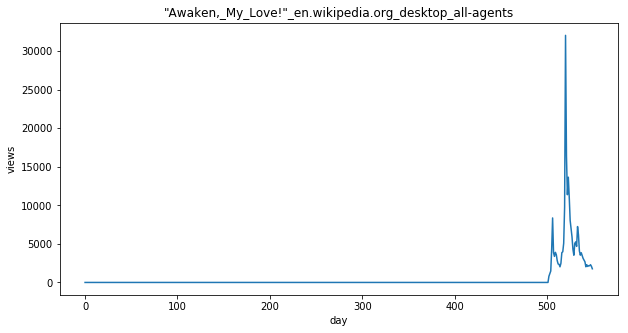

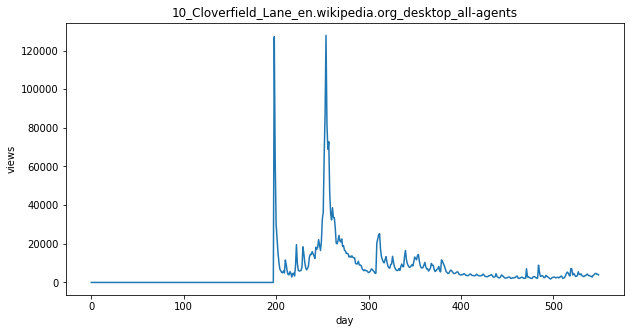

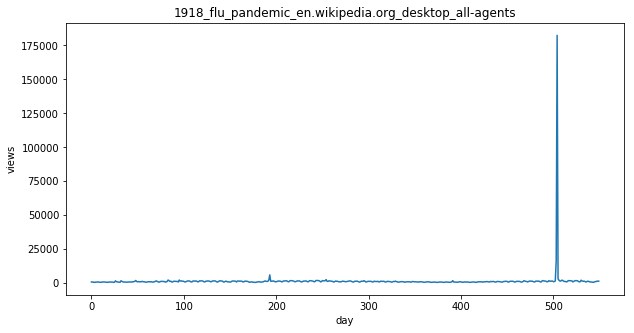

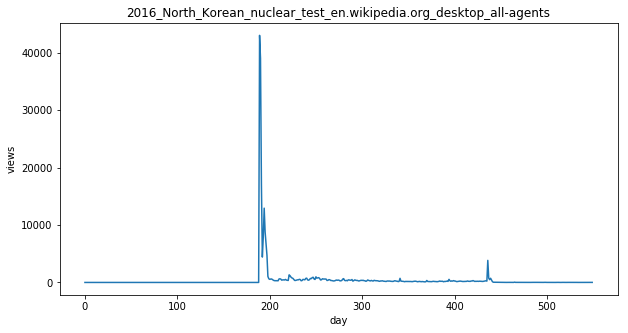

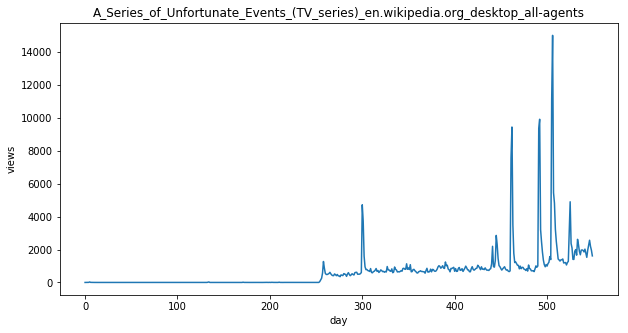

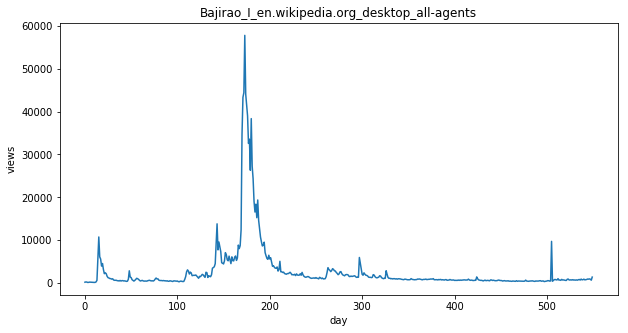

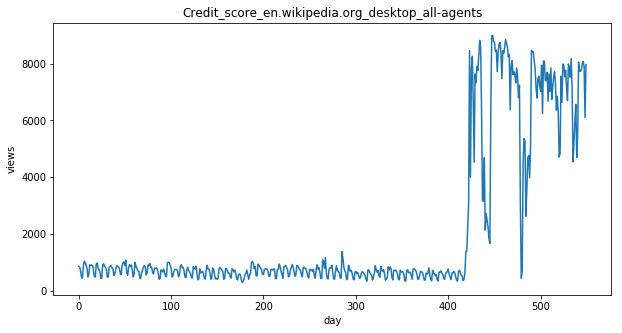

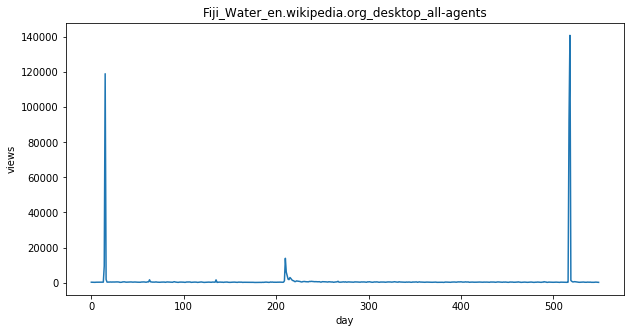

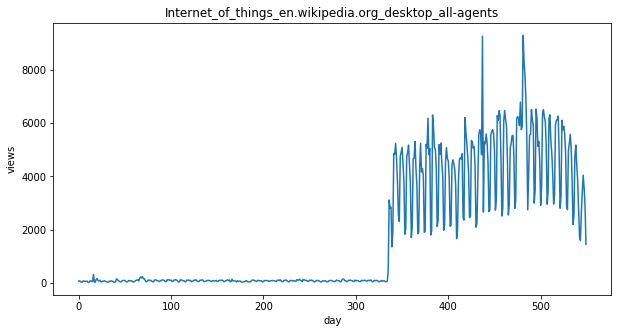

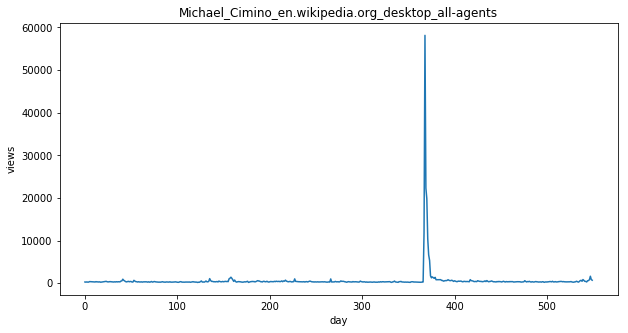

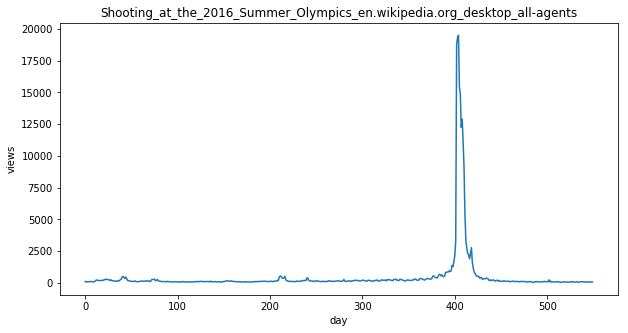

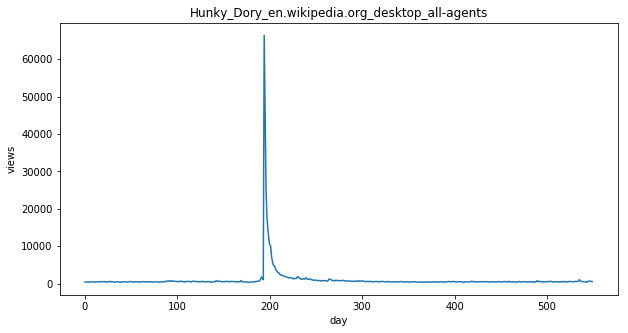

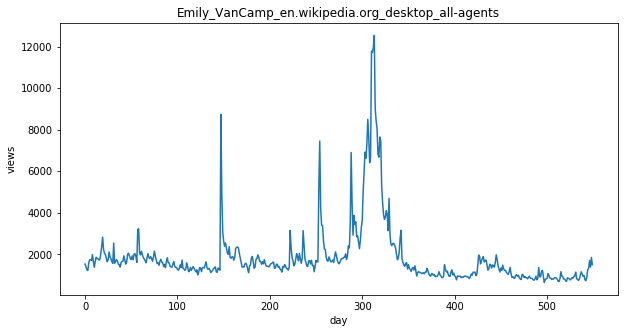

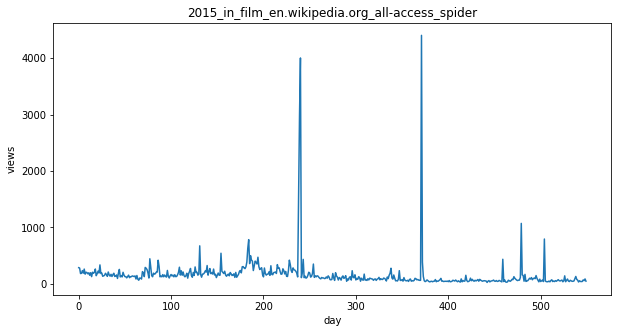

In [32]:
idx = [1, 5, 10, 50, 100, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 5000]
for i in idx:
    plot_entry('en', i)

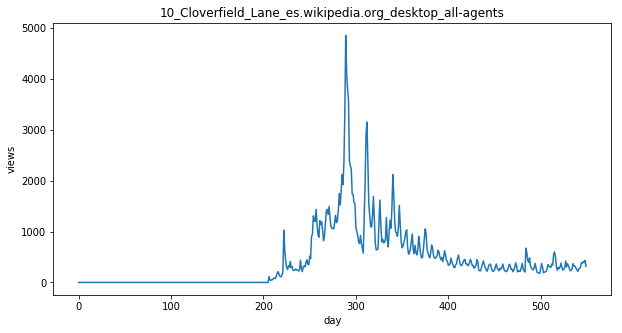

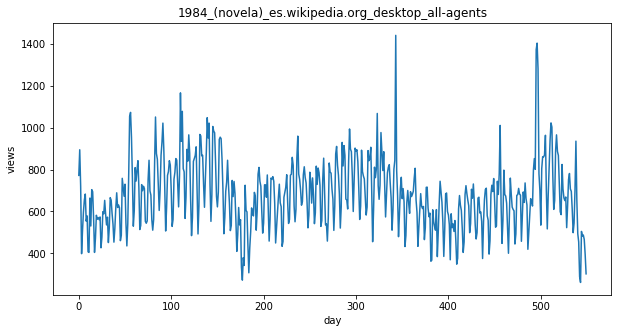

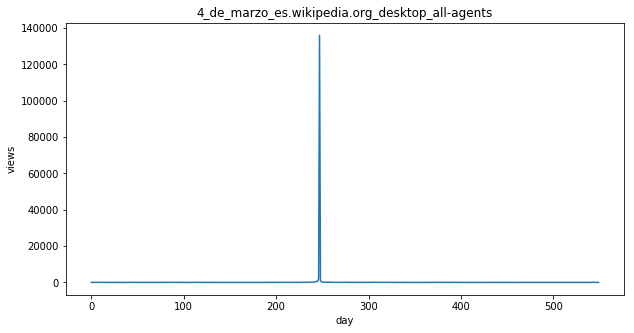

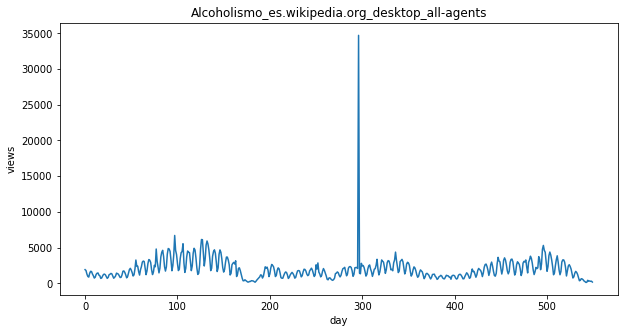

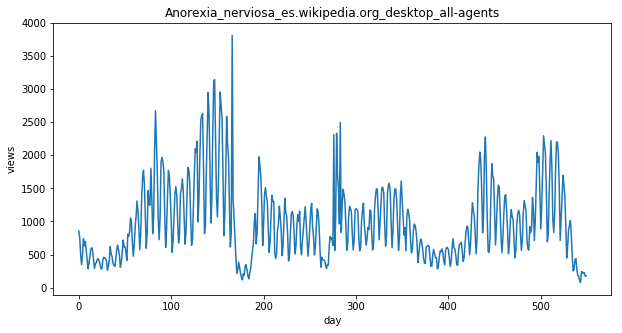

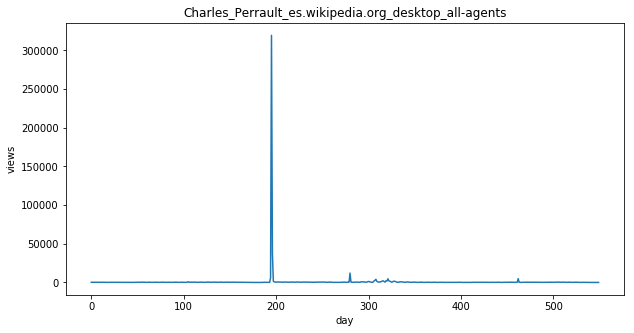

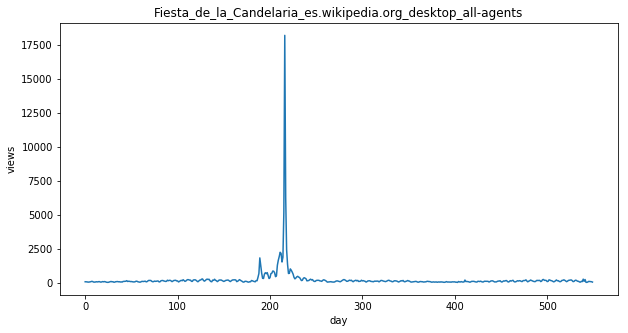

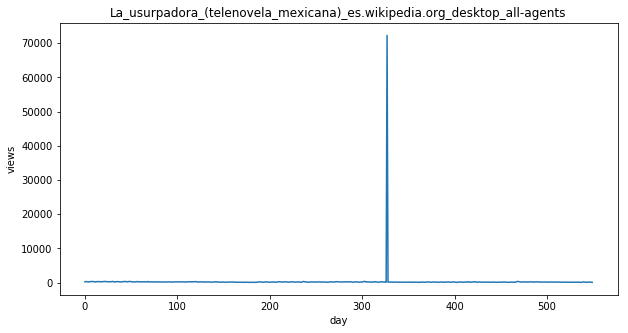

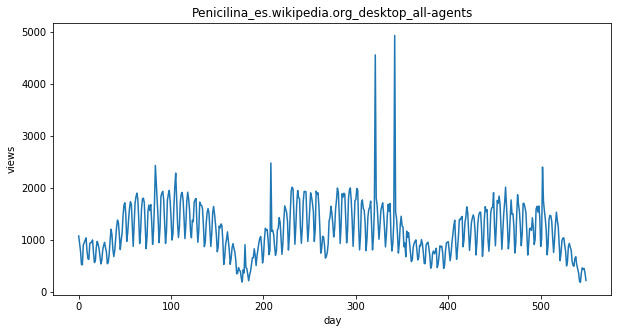

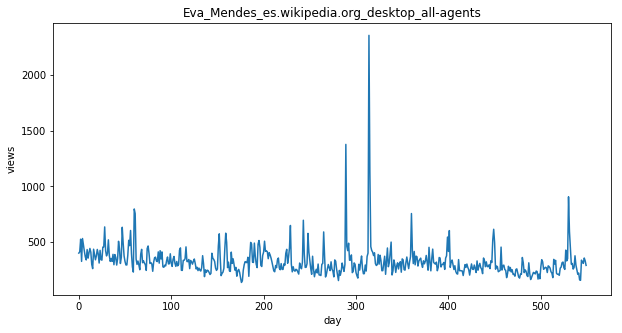

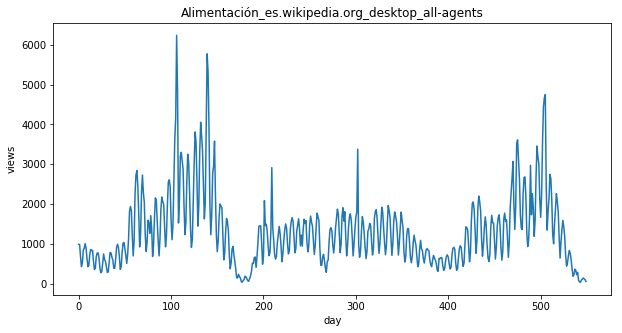

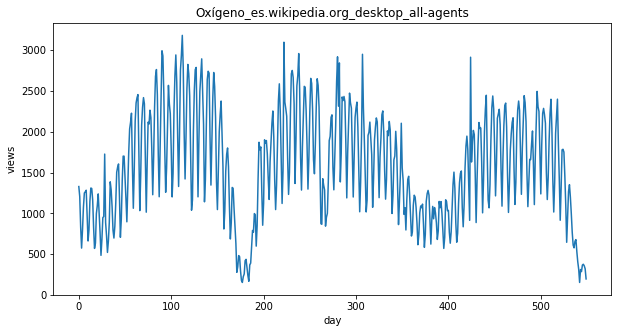

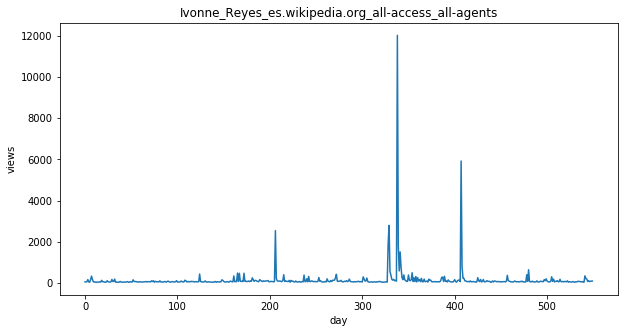

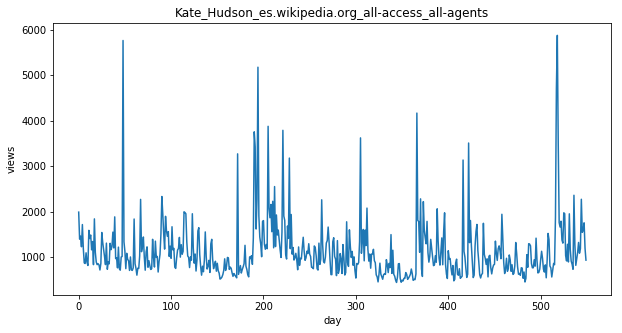

In [33]:
idx = [1, 5, 10, 50, 100, 250, 500, 750, 1001, 1500, 2000, 3000, 4000, 5000]
for i in idx:
    plot_entry('es', i)

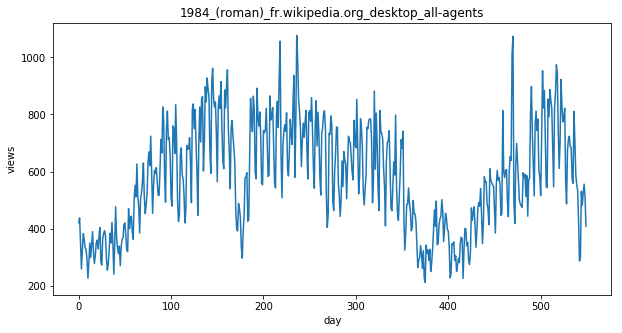

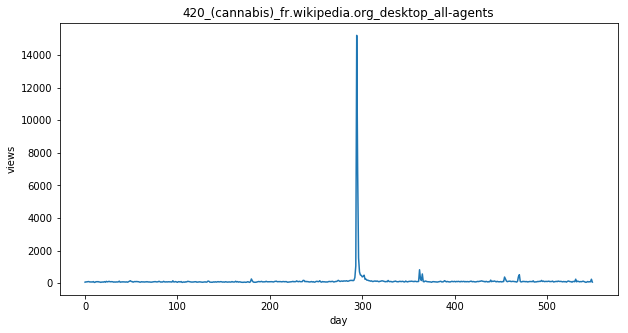

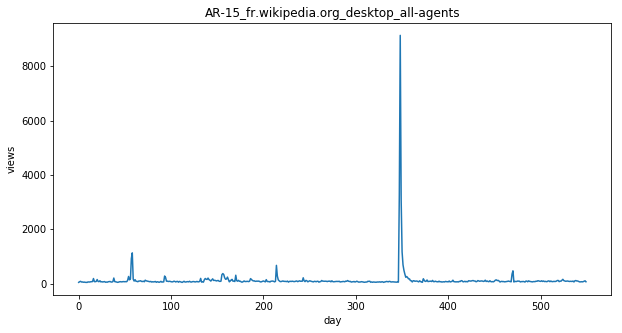

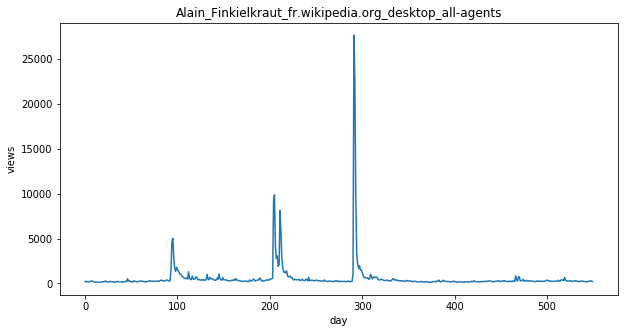

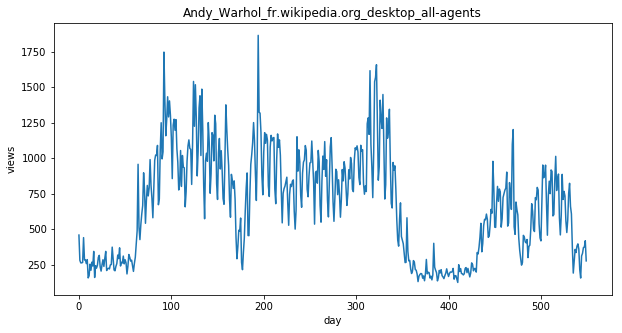

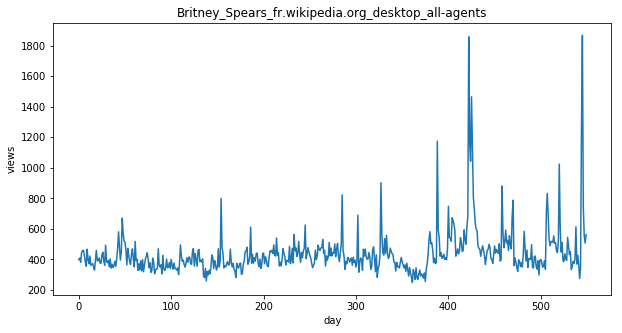

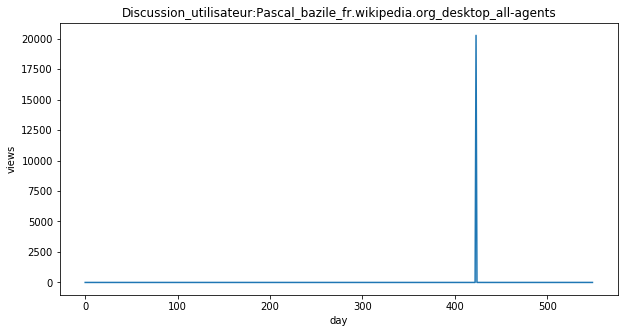

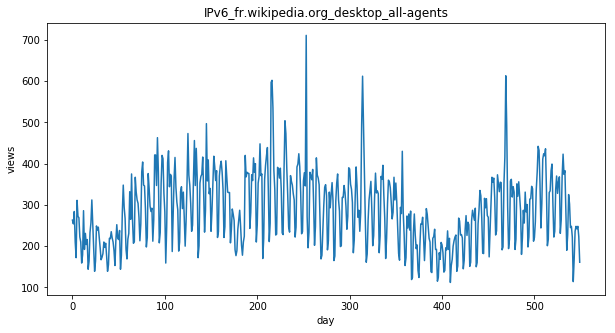

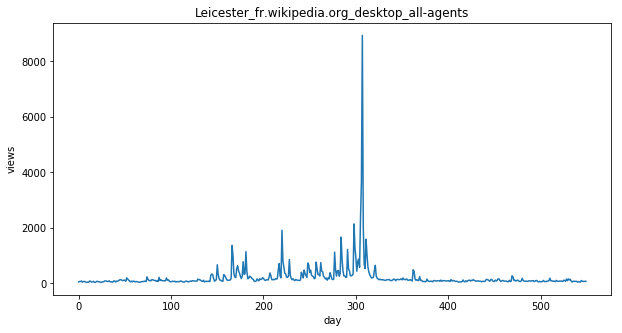

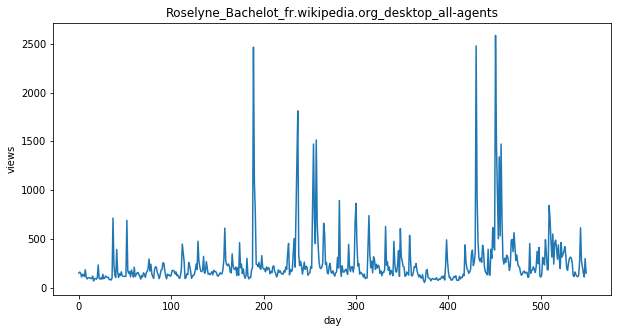

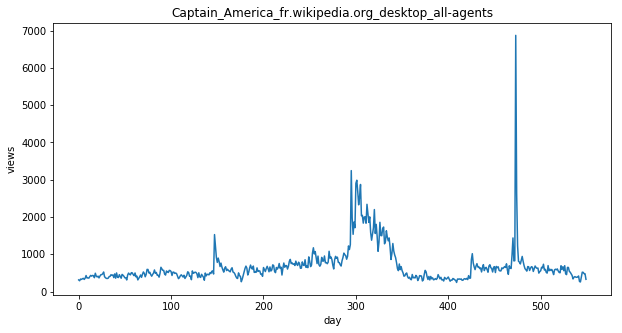

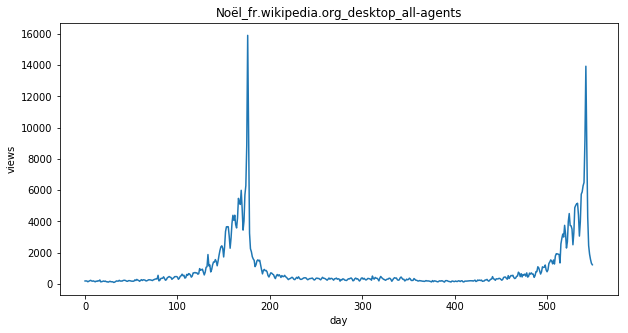

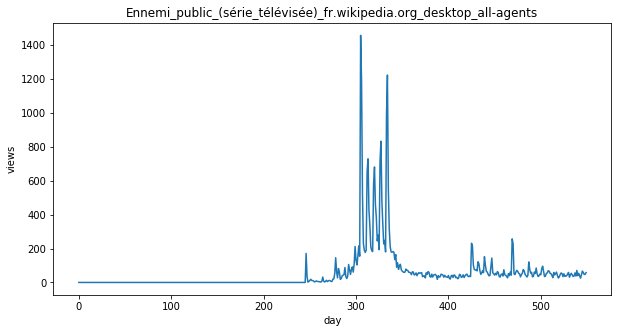

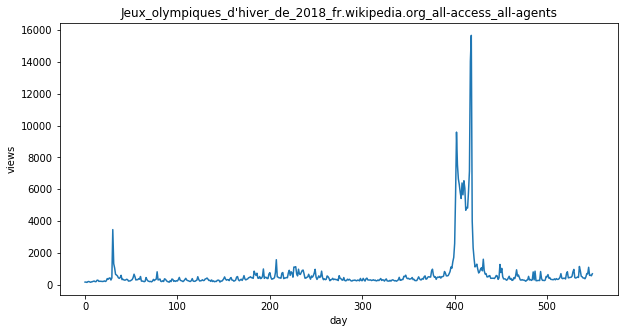

In [34]:
idx = [1, 5, 10, 50, 100, 250, 500, 750, 1001, 1500, 2000, 3000, 4000, 5000]
for i in idx:
    plot_entry('fr', i)

In [35]:
# For each language get highest few pages
npages = 5
top_pages = {}
for key in lang_sets:
    print(key)
    sum_set = pd.DataFrame(lang_sets[key][['Page']])
    sum_set['total'] = lang_sets[key].sum(axis=1)
    sum_set = sum_set.sort_values('total', ascending=False)
    print(sum_set.head(10))
    top_pages[key] = sum_set.index[0]
    print('\n\n')

zh
                                                     Page      total
28727   Wikipedia:首页_zh.wikipedia.org_all-access_all-a...  123694312
61350    Wikipedia:首页_zh.wikipedia.org_desktop_all-agents   66435641
105844  Wikipedia:首页_zh.wikipedia.org_mobile-web_all-a...   50887429
28728   Special:搜索_zh.wikipedia.org_all-access_all-agents   48678124
61351      Special:搜索_zh.wikipedia.org_desktop_all-agents   48203843
28089   Running_Man_zh.wikipedia.org_all-access_all-ag...   11485845
30960   Special:链接搜索_zh.wikipedia.org_all-access_all-a...   10320403
63510    Special:链接搜索_zh.wikipedia.org_desktop_all-agents   10320336
60711     Running_Man_zh.wikipedia.org_desktop_all-agents    7968443
30446    瑯琊榜_(電視劇)_zh.wikipedia.org_all-access_all-agents    5891589



ru
                                                     Page       total
99322   Заглавная_страница_ru.wikipedia.org_all-access...  1086019452
103123  Заглавная_страница_ru.wikipedia.org_desktop_al...   742880016
17670   Заглавная_стра

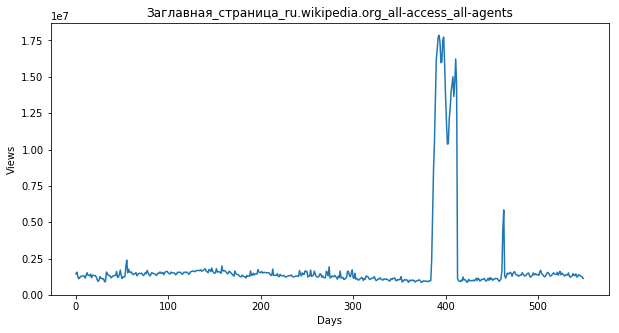

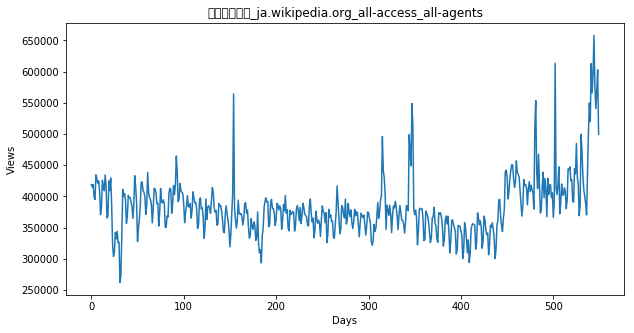

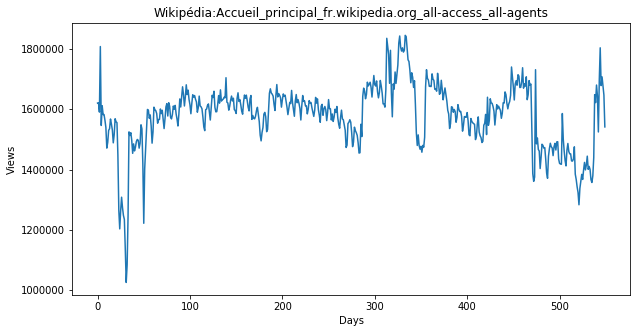

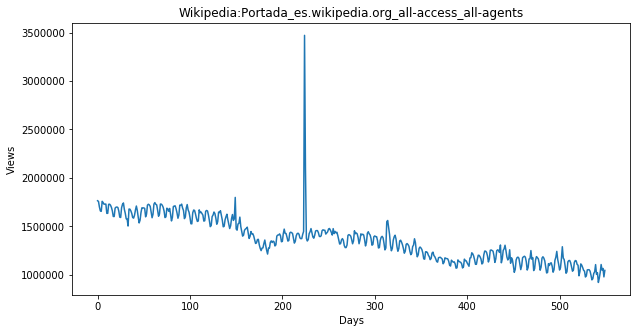

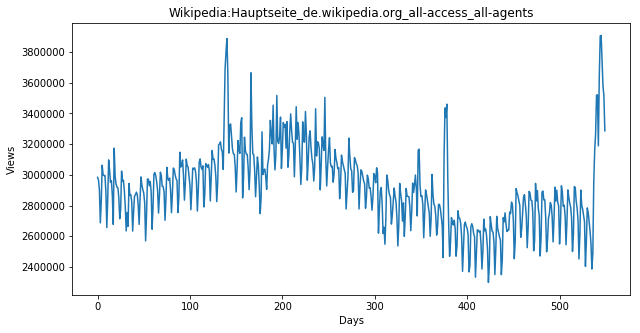

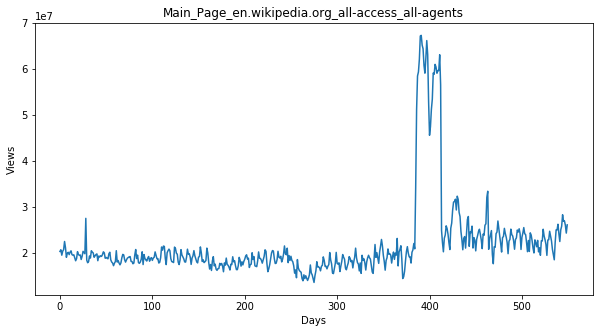

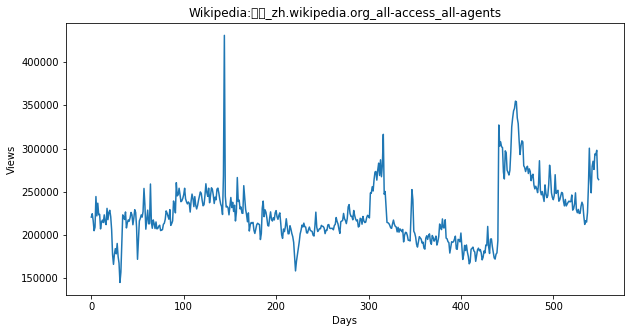

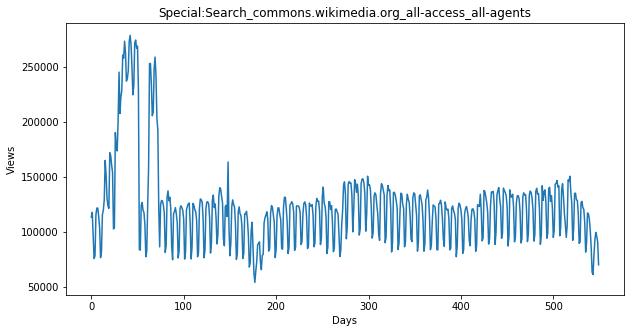

In [36]:
for key in top_pages:
    plt.figure(figsize=(10, 5))
    cols = train.columns
    cols = cols[1:-1]
    data = train.loc[top_pages[key], cols]
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.title(train.loc[top_pages[key],'Page'])
    plt.plot(days, data)
    plt.show()

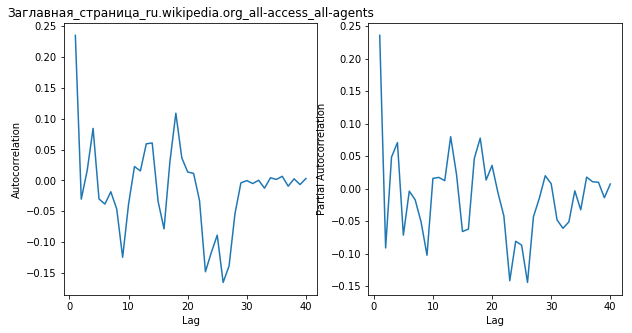

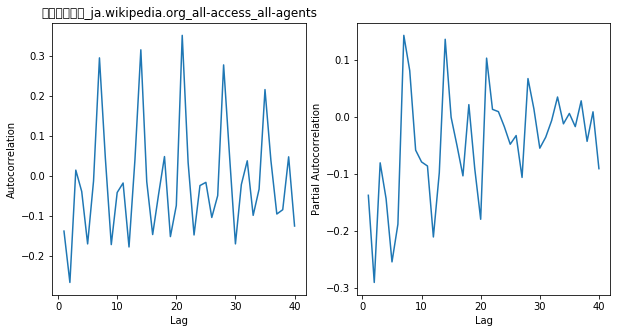

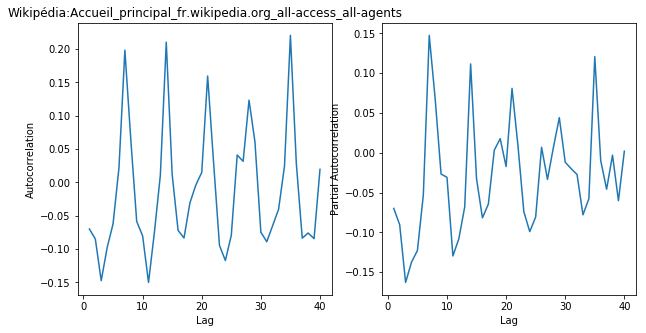

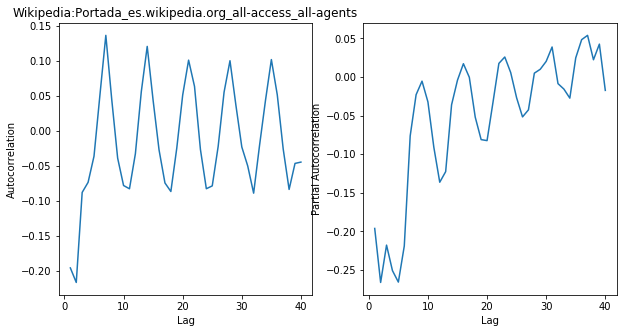

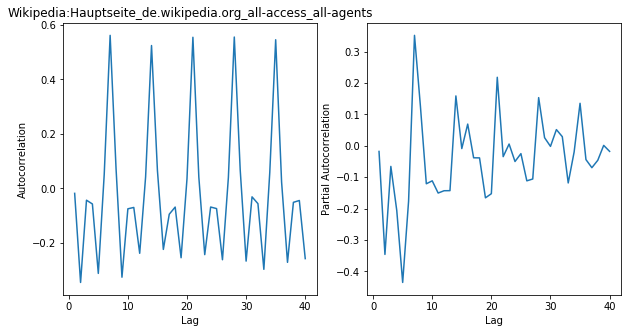

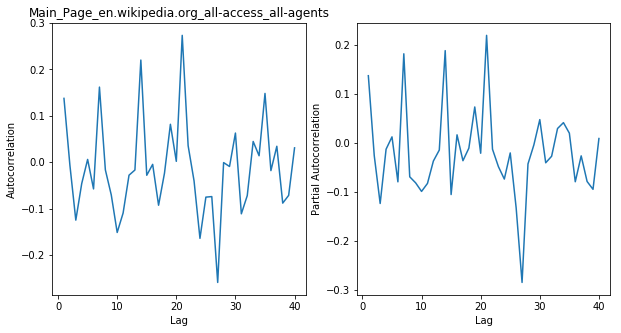

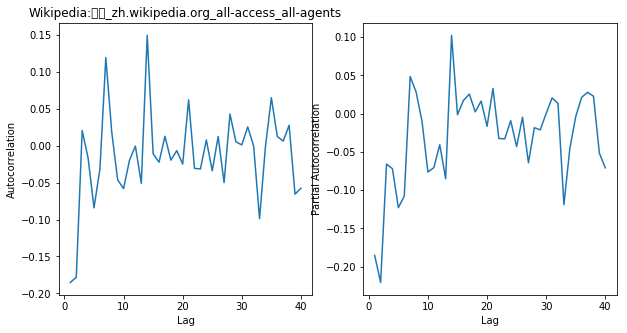

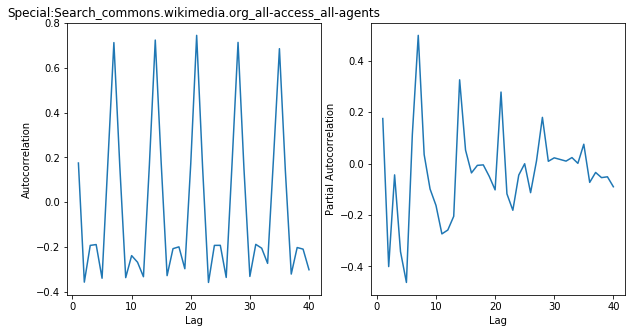

In [39]:
for key in top_pages:
    fig = plt.figure(figsize=[10, 5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    cols = train.columns[1:-1]
    data = np.array(train.loc[top_pages[key], cols])
    data_diff = [data[i] - data[i-1] for i in range(1, len(data))]
    autocorr = acf(data_diff)
    pac = pacf(data_diff)
    x = list(range(len(pac)))

    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(train.loc[top_pages[key], 'Page'])
    ax1.plot(x[1:], autocorr[1:])

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    ax2.plot(x[1:], pac[1:])
    
    plt.show()

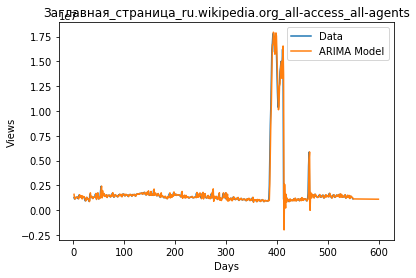

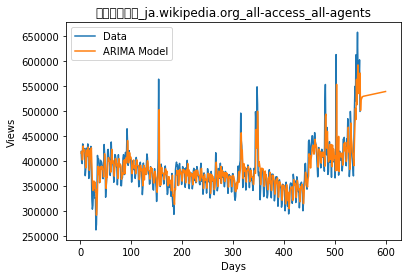

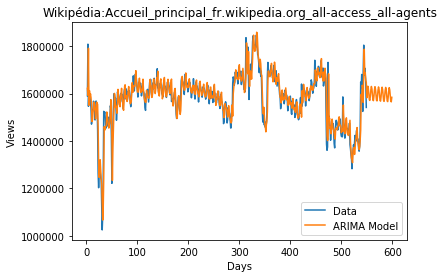

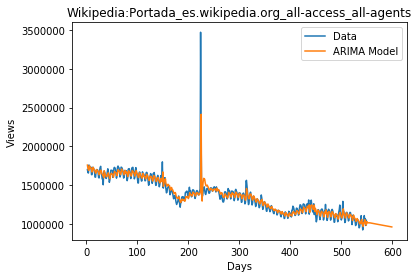

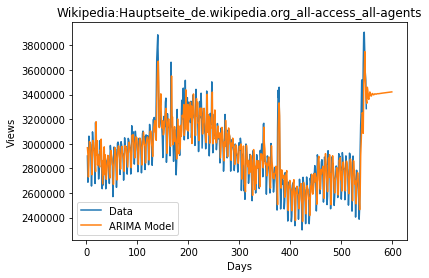

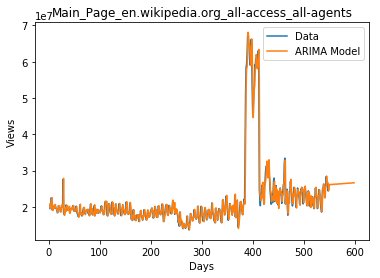

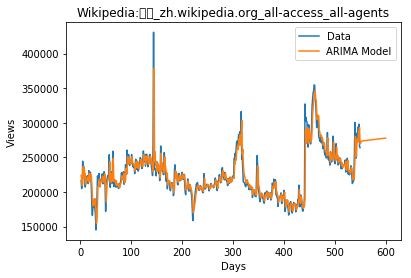

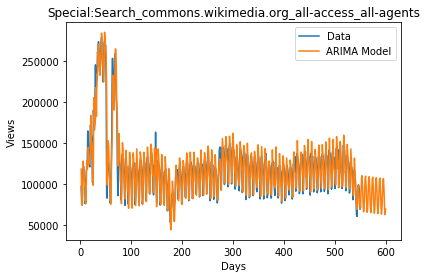

In [41]:
cols = train.columns[1:-1]
for key in top_pages:
    data = np.array(train.loc[top_pages[key], cols], 'f')
    result = None
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore')
        try:
            arima = ARIMA(data, [2, 1, 4])
            result = arima.fit(disp=False)
        except:
            try:
                arima = ARIMA(data, [2, 1, 2])
                result = arima.fit(disp=False)
            except:
                print(train.loc[top_pages[key], 'Page'])
                print('\tARIMA failed')

    pred = result.predict(2, 599, typ='levels')
    x = list(range(600))
    i = 0

    plt.plot(x[2:len(data)], data[2:], label='Data')
    plt.plot(x[2:], pred, label='ARIMA Model')
    plt.title(train.loc[top_pages[key], 'Page'])
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()